In [1]:
!pip install -U openmim
!mim install 'mmcv>=2.0.0'
!mim install 'mmengine'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 28.7 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html


In [2]:
!git clone https://github.com/open-mmlab/mmagic.git
%cd mmagic
!pip3 install -e . -v

Cloning into 'mmagic'...
remote: Enumerating objects: 25648, done.
remote: Counting objects: 100% (3612/3612), done.
remote: Compressing objects: 100% (1571/1571), done.
remote: Total 25648 (delta 2023), reused 3216 (delta 1988), pack-reused 22036
Receiving objects: 100% (25648/25648), 21.60 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (17181/17181), done.
/content/mmagic
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmagic
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/dist.py:519: InformationOnly: Normalizing '1.0.2dev0' to '1.0.2.dev0'
    self.metadata.version = self._normalize_version(
  running egg_info
  creating /tmp/pip-pip-egg-info-12tv5fr2/mmagic.egg-info
  writing /tmp/pip-pip-egg-info-12tv5fr2/mmagic.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-i

In [3]:
%cd ~
!python -c "import mmagic; print(mmagic.__version__)"
# 示例输出: 1.0.0

/root
1.0.2dev0


In [4]:
%cd /content/mmagic

/content/mmagic


In [5]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 11:03:31 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 11:04:18 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/content/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/18 11:04:40 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


In [23]:
control_img = mmcv.imread('./test.jpg')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

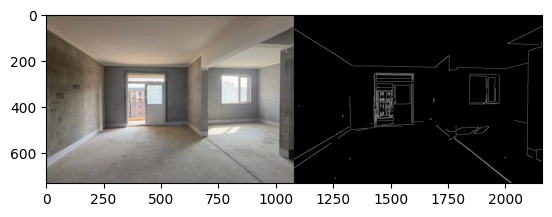

In [25]:
import matplotlib.pyplot as plt

ax = plt.subplots()
plt.imshow(np.concatenate((control_img, control),axis=1)[:,:,::-1])

In [26]:
prompt = 'a beautiful room with some furniture'

In [27]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
  sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
  control.save(f'control_{idx}.png')

/content/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)
100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


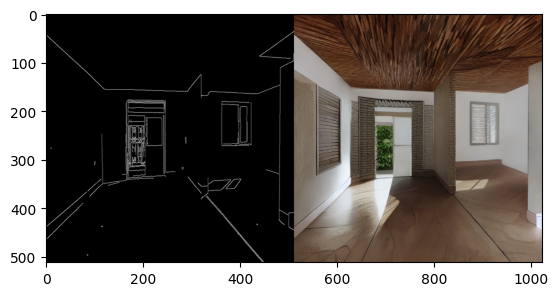

In [29]:
control_img = mmcv.imread('./test.jpg')
control_0 = mmcv.imread('./control_0.png')
sample_0 = mmcv.imread('./sample_0.png')
ax = plt.subplots()
plt.imshow(np.concatenate((control_0, sample_0),axis=1)[:,:,::-1])